Dataset 1 Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4560 entries, 0 to 4559
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   home_team   4560 non-null   object 
 1   away_team   4560 non-null   object 
 2   home_goals  4560 non-null   float64
 3   away_goals  4560 non-null   float64
 4   result      4560 non-null   object 
 5   season      4560 non-null   object 
dtypes: float64(2), object(4)
memory usage: 213.9+ KB
None

Dataset 2 Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 42 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   team                  240 non-null    object 
 1   wins                  240 non-null    float64
 2   losses                240 non-null    float64
 3   goals                 240 non-null    float64
 4   total_yel_card        240 non-null    float64
 5   total_r

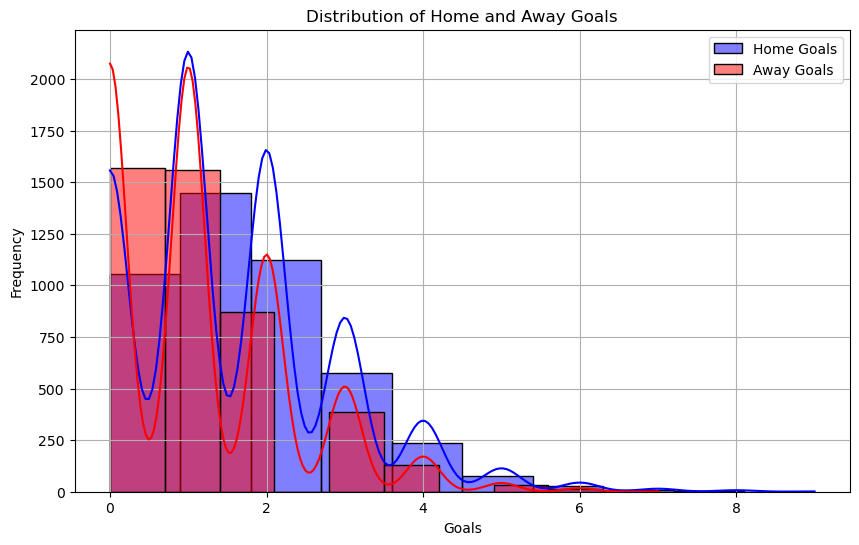

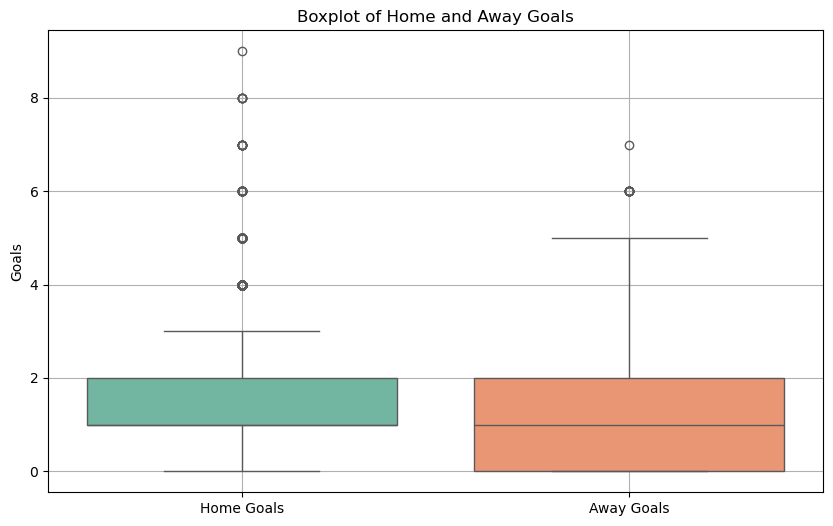

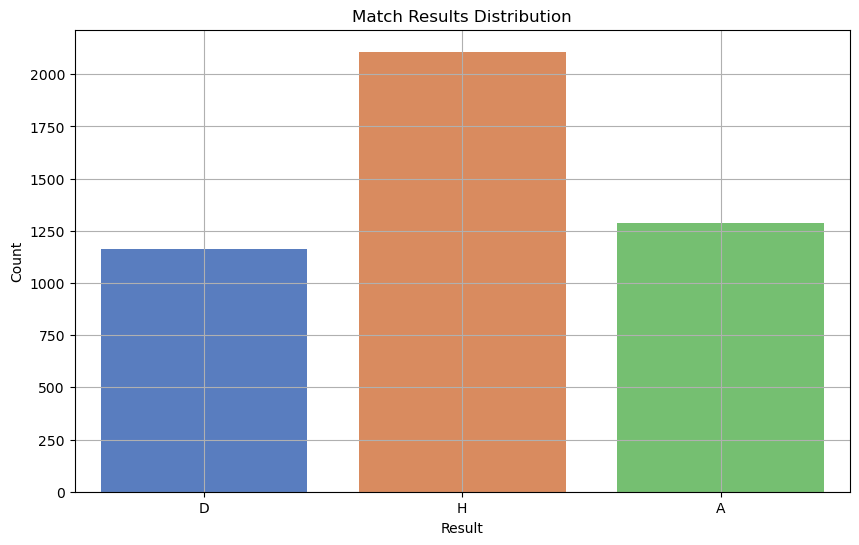

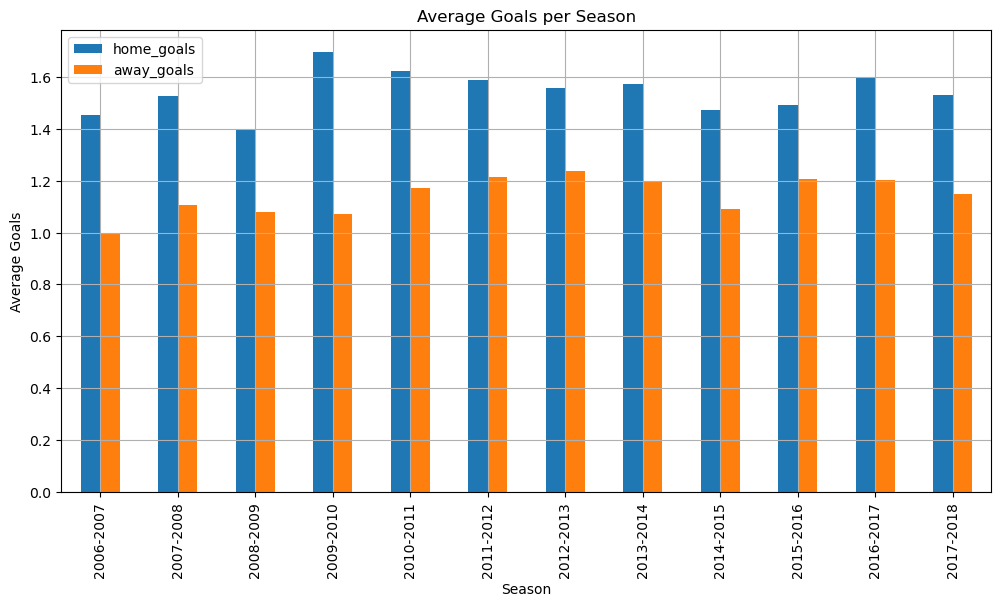

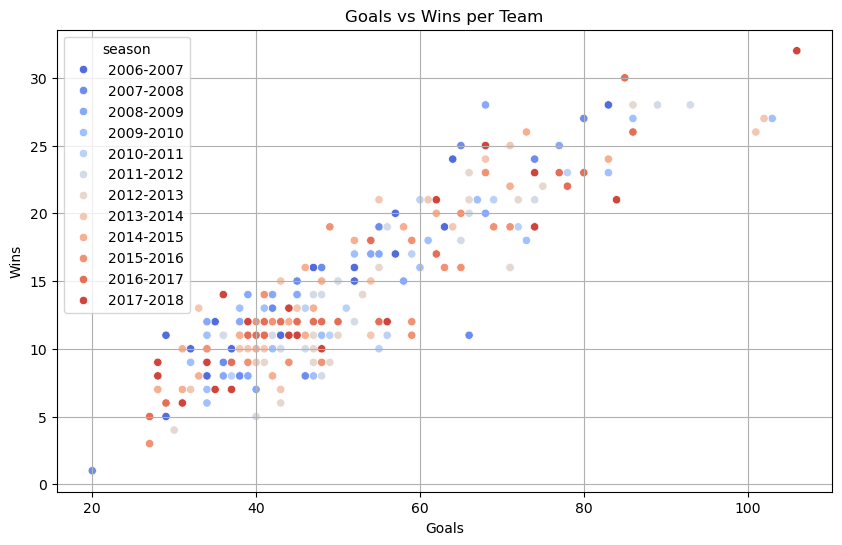

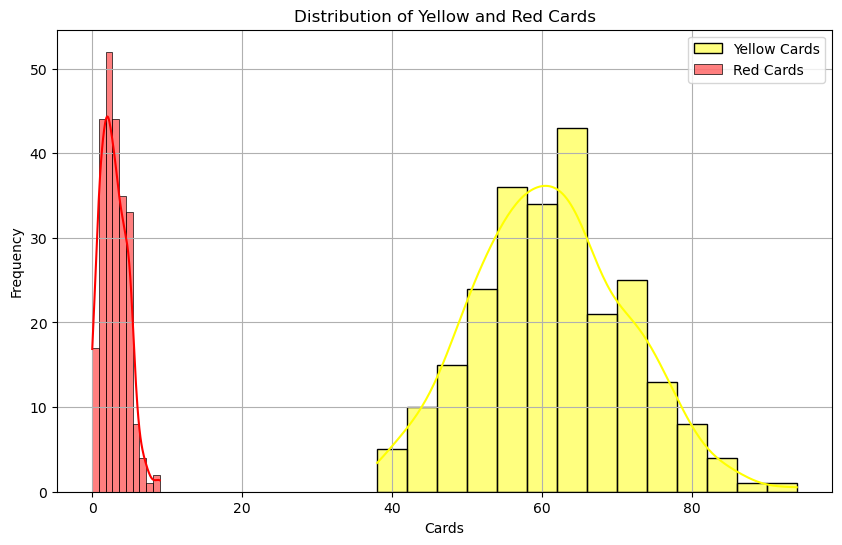

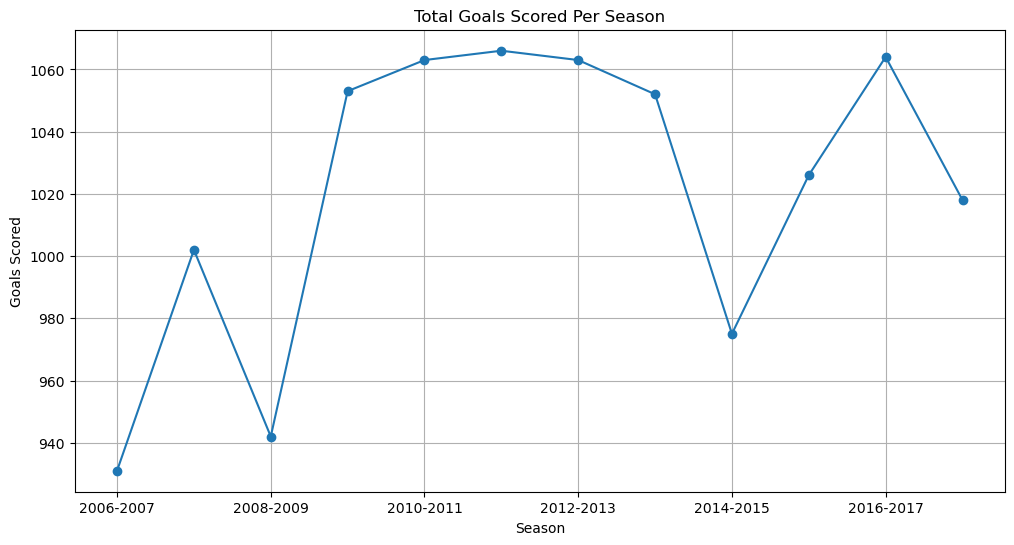

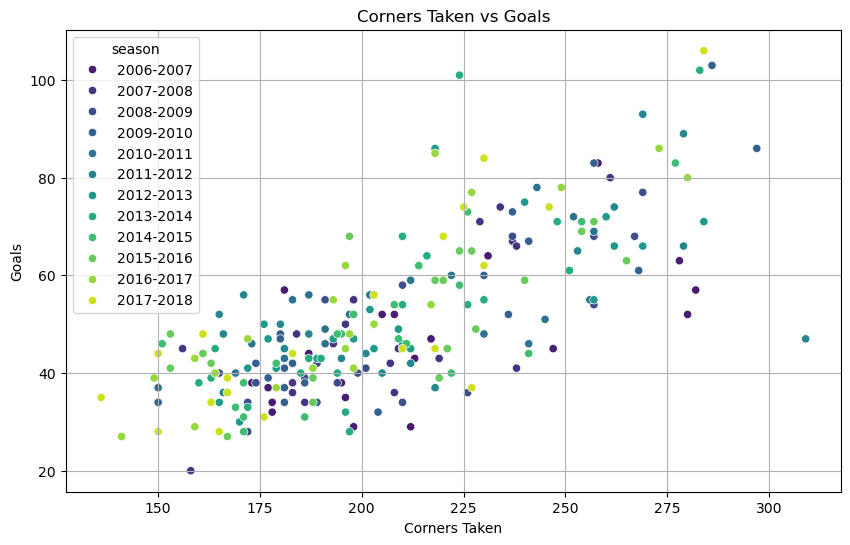

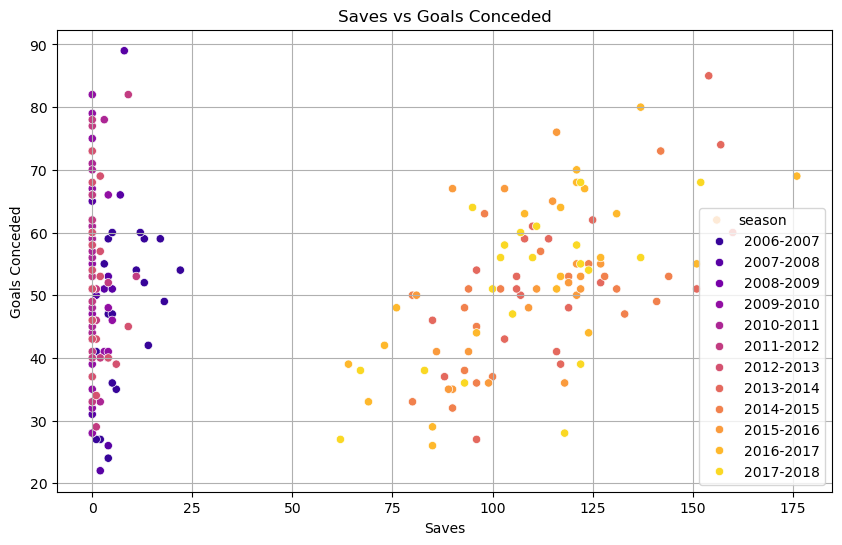

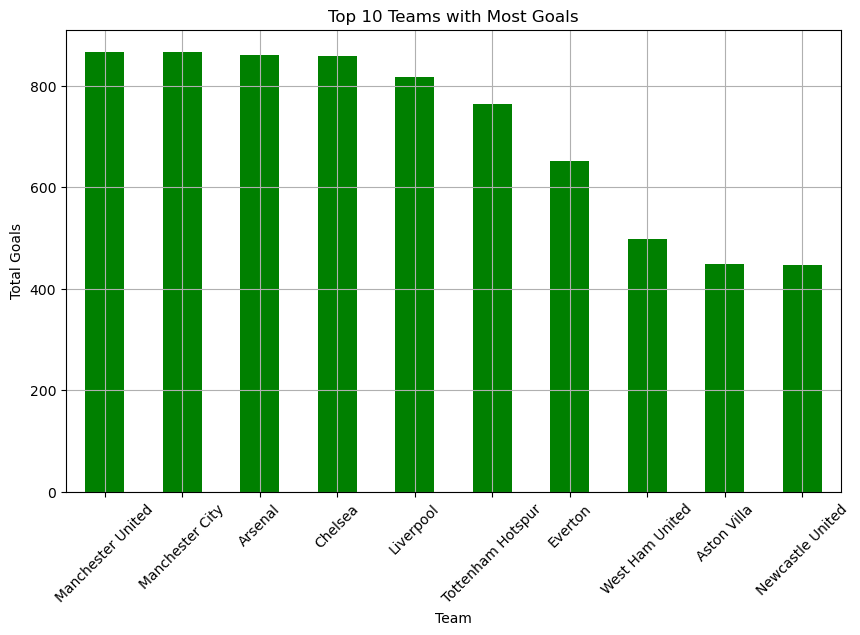

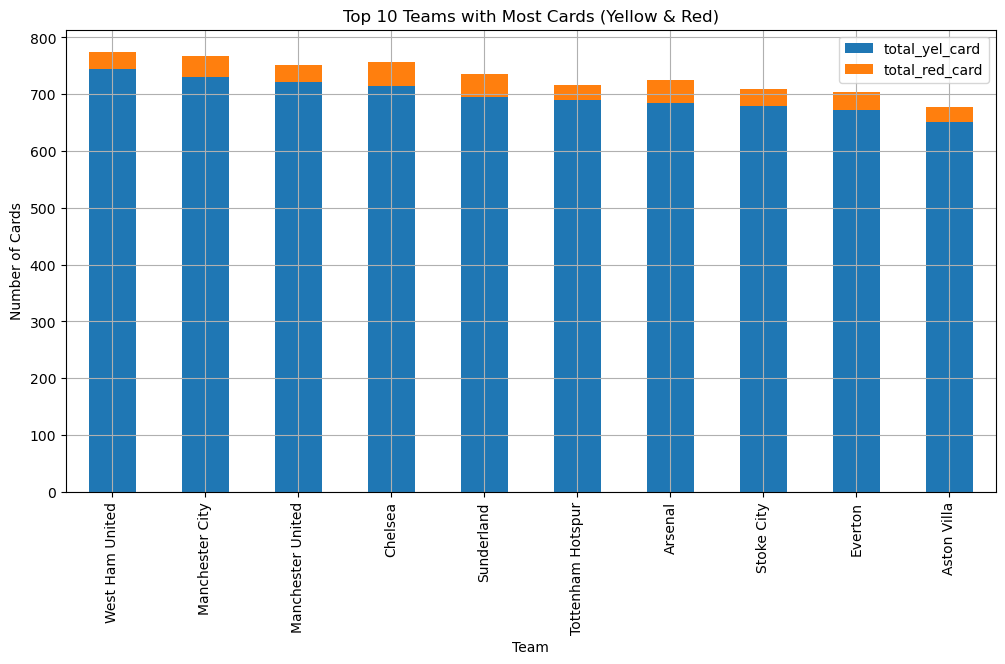

In [14]:
# Football Dataset - EDA Notebook

# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# Load datasets
data1 = pd.read_csv('archive/results.csv')
data2 = pd.read_csv('archive/stats.csv')

# Display basic info
print("Dataset 1 Info:")
print(data1.info())
print("\nDataset 2 Info:")
print(data2.info())

# Check for missing values
print("\nMissing Values in Data 1:")
print(data1.isnull().sum())
print("\nMissing Values in Data 2:")
print(data2.isnull().sum())

# Display first few rows
print("\nData 1 Preview:")
print(data1.head())
print("\nData 2 Preview:")
print(data2.head())

# Descriptive statistics
print("\nData 1 Statistics:")
print(data1.describe())
print("\nData 2 Statistics:")
print(data2.describe())

# ----------- VISUALIZATIONS -----------

# Distribution of Home and Away Goals
plt.figure(figsize=(10, 6))
sns.histplot(data1['home_goals'], bins=10, kde=True, color='blue', label='Home Goals')
sns.histplot(data1['away_goals'], bins=10, kde=True, color='red', label='Away Goals')
plt.title('Distribution of Home and Away Goals')
plt.xlabel('Goals')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

# Boxplot of Home and Away Goals
plt.figure(figsize=(10, 6))
sns.boxplot(data=[data1['home_goals'], data1['away_goals']], palette="Set2")
plt.xticks([0, 1], ['Home Goals', 'Away Goals'])
plt.title('Boxplot of Home and Away Goals')
plt.ylabel('Goals')
plt.grid(True)
plt.show()

# Match Results Distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=data1, x='result', palette="muted")
plt.title('Match Results Distribution')
plt.xlabel('Result')
plt.ylabel('Count')
plt.grid(True)
plt.show()

# Average Goals per Season
season_goals = data1.groupby('season')[['home_goals', 'away_goals']].mean()
season_goals.plot(kind='bar', figsize=(12, 6))
plt.title('Average Goals per Season')
plt.xlabel('Season')
plt.ylabel('Average Goals')
plt.grid(True)
plt.show()

# Goals vs Wins Scatterplot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data2, x='goals', y='wins', hue='season', palette='coolwarm')
plt.title('Goals vs Wins per Team')
plt.xlabel('Goals')
plt.ylabel('Wins')
plt.grid(True)
plt.show()

# Distribution of Yellow and Red Cards
plt.figure(figsize=(10, 6))
sns.histplot(data2['total_yel_card'], kde=True, color='yellow', label='Yellow Cards')
sns.histplot(data2['total_red_card'], kde=True, color='red', label='Red Cards')
plt.title('Distribution of Yellow and Red Cards')
plt.xlabel('Cards')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

# Total Goals Scored Per Season
top_scorers = data2.groupby('season')['goals'].sum()
top_scorers.plot(kind='line', marker='o', figsize=(12, 6))
plt.title('Total Goals Scored Per Season')
plt.xlabel('Season')
plt.ylabel('Goals Scored')
plt.grid(True)
plt.show()

# Corners Taken vs Goals
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data2, x='corner_taken', y='goals', hue='season', palette='viridis')
plt.title('Corners Taken vs Goals')
plt.xlabel('Corners Taken')
plt.ylabel('Goals')
plt.grid(True)
plt.show()

# Saves vs Goals Conceded
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data2, x='saves', y='goals_conceded', hue='season', palette='plasma')
plt.title('Saves vs Goals Conceded')
plt.xlabel('Saves')
plt.ylabel('Goals Conceded')
plt.grid(True)
plt.show()

# ----------- ADDITIONAL ANALYSIS -----------

# Average Goals by Team
team_goals = data2.groupby('team')['goals'].sum().sort_values(ascending=False).head(10)
team_goals.plot(kind='bar', figsize=(10, 6), color='green')
plt.title('Top 10 Teams with Most Goals')
plt.xlabel('Team')
plt.ylabel('Total Goals')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Cards Analysis - Teams with Most Yellow and Red Cards
cards = data2.groupby('team')[['total_yel_card', 'total_red_card']].sum().sort_values(by='total_yel_card', ascending=False).head(10)
cards.plot(kind='bar', figsize=(12, 6), stacked=True)
plt.title('Top 10 Teams with Most Cards (Yellow & Red)')
plt.xlabel('Team')
plt.ylabel('Number of Cards')
plt.grid(True)
plt.show()

